In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu

In [203]:
def list_of_list_to_string(LL, sep=" "):
    
    return '\n\n'.join([sep.join([str(x) for x in line]) for line in LL])

In [65]:
title_len = lambda df: list(map(len, map(lambda x: x.split(), df['title'])))
title_charlen = lambda df: list(map(len, df['title']))
 

In [4]:
nb.word_form('vel')

['adv normert',
 'subst nøyt appell ent ub normert',
 'subst nøyt appell fl ub normert',
 'subst nøyt appell ubøy normert']

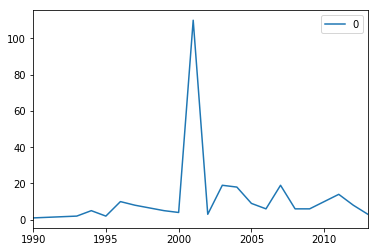

In [5]:
nb.unigram('paratekst', period=(1950, 2020)).plot()

In [190]:
def multi_uni(words, **kwarg):
    import pandas as pd
    res = dict()
    if isinstance(words, str):
        words = words.split()
    for w in words:
        res[w] = nb.unigram(w, **kwarg)
        res[w].columns = [w]
    return pd.concat([res[w] for w in res], axis=1)

In [7]:
punkt = multi_uni(". , i og det er".split()).sum(axis=1)

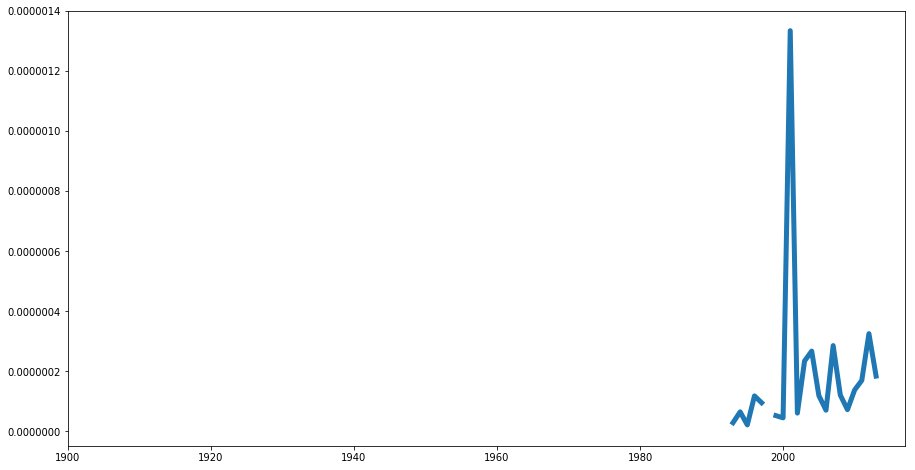

In [191]:
((multi_uni('paratekst Paratekst'.split()).sum(axis=1))/punkt).plot(figsize=(15, 8), lw=5);

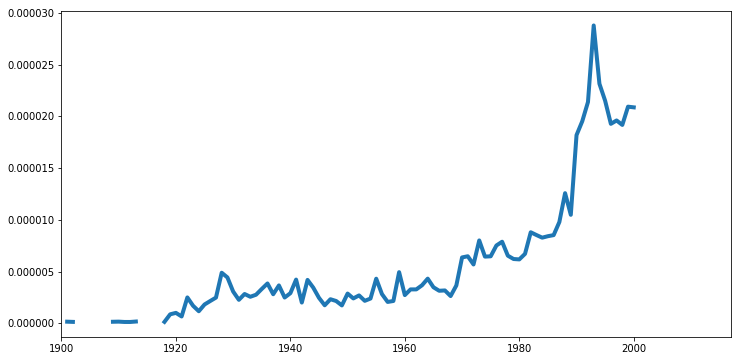

In [199]:
(multi_uni('Innholdsfortegnelse innholdsfortegnelse'.split(), period=(1900, 2000)).sum(axis=1)/punkt).plot(figsize=(12,6), lw=4)

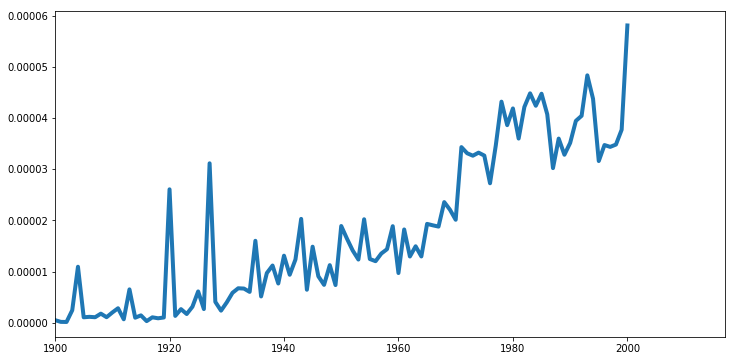

In [198]:
(multi_uni('indeks Indeks'.split(), period=(1900, 2000)).sum(axis=1)/punkt).plot(figsize=(12,6), lw=4)

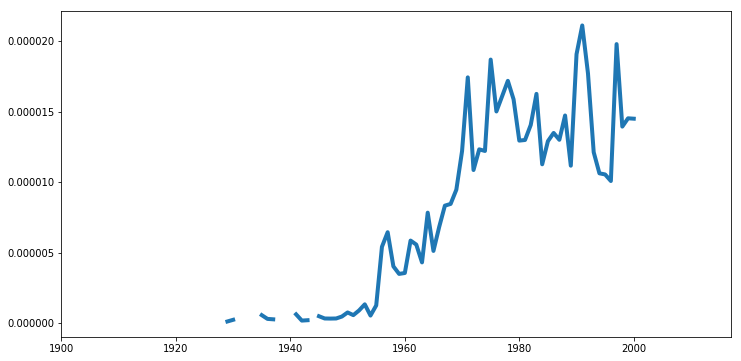

In [197]:
(multi_uni('fotnote Fotnote fotnoter Fotnoter'.split(), period=(1900, 2000), ddk="%").sum(axis=1)/punkt).plot(figsize=(12,6), lw=4)

In [9]:
urns = nb.book_urn(words=['paratekst', 'Paratekst'], period=(1950, 2020), limit=500)

In [10]:
pontoppidan = nb.book_urn(author='pontop%')

In [11]:
mu.printmd(list_of_list_to_string(pontoppidan))

2009020900024 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans forklaring 1903

2008090902002 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring 1849

2015060948103 Pontoppidan, Erik Nye Psalme-Bog 1745

2008091800013 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring 1860

2008091800006 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Enfoldiges Nytte 1846

2012060412003 Pontoppidan, Erik Forklaring over Luthers lille katekisme 1909

2008041601025 Pontoppidan, Henrik Hamskifte 1936

2011120508004 Pontoppidan, Erik Sannhet til gudfryktighet 1954

2010042003010 Pontoppidan, Erik Sandhed til Gudfrygtighed 1836

2010030903073 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring 1856

2010090608103 Pontoppidan, Henrik Borgmester Hoeck og hustru 1999

2008100603021 Pontoppidan, Erik Opvækkelige Hyrde-Breve 1849

2008091800021 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Enfoldiges Nytte 1860

2016090948103 Pontoppidan, Erik Sannhet til gudfryktighet 1981

2014061908035 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring 1861

2008091800007 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring, til de Enfoldiges Nytte 1862

2010041903023 Pontoppidan, Erik Sandhed til Gudfrygtighed 1842

2013100308042 Pontoppidan, Morten Aldrig fortvivle 1899

2007011600069 Pontoppidan, Henrik Lykke-Per 1938

2009051203045 Pontoppidan, Henrik Fortællinger 1899

In [12]:
len(urns)

91

In [13]:
mu.printmd(list_of_list_to_string(nb.best_book_urn(word='paratekst', ddk='%')))

2009010804047 Solhjell, Dag Formidler og formidlet 2001

2011032206046 Røssaak, Eivind (Sic) 2001

2011070808020 Hågvar, Yngve Benestad Hele folkets diskurs 2003

2011071206070 Tveit, Åse Kristine Innganger 2004

2012082206068  Kulturvern ved bergverk 2010 2011

2013070906052 Sæter, Gjertrud Diskurser om svigermor 2010

2011070405178 Brinch, Sara Historietimer for mediesamfunnet 2004

2008112704047  Innkjøpt 2001

2016070708147 Engebretsen, Martin Nyheten som hypertekst 2001

2009031204016 Lothe, Jakob Litteraturvitenskapelig leksikon 1997

2014051405013 Engebretsen, Martin Nyheten som hypertekst 2001

2013072208273 Mjør, Ingeborg Barnelitteratur 2012

2013061106015 Rekdal, Elin Kjønn og retorikk i tekst og teori: Toril Moi 2008

2009061704015  Blikkfang 2003

2008020701060 Eco, Umberto Seks turer i fortellingenes skoger 1994

2016022308204 Nøding, Aina Vittige kameleoner 2007

2015091506092 Aschim, Anders Bibelen 3.0 2013

2013080508183 Lykke, Jon I møte mellom ord og bilde 2000

2013071008053  Teorier om tekst i møte med skolens lese- og skrivepraksiser 2012

2012062906094  Tekst i vekst 2007

# Katekismer

In [14]:
kat = nb.book_urn(title='%atekism%', limit=3000)
chat = nb.book_urn(title='%atechis%', limit=3000)
kat = kat + chat

luther = [x for x in kat if 'Luth' in x[2]]

luther.sort(key=lambda x: len(x[2]), reverse=True)

luther[-1]

luther_df = nb.frame(luther, "urn author title year".split()).sort_values(by='year')

In [15]:
luther

[[2016052626003,
  'Luther, Martin',
  'Dr. M. Luthers liden (eller mindre) Katechismus, med Børnelærdoms Visitats i Almindelighed, saa og om enfoldigt Skriftemaal med nogle nyttige Spørgsmaal, efter Dr. Mr. Luthers rette Mening, samt Sententser af Guds Ord til Troens Bestyrkelse for de Enfoldige',
  1849],
 [2016060348162,
  'Pontoppidan, Erik',
  'Sandhed til Gudfrygtighed, i en enfoldig og efter Mulighed kort, dog tilstrækkelig Forklaring over Sal. Dr. Morten Luthers liden Catechismus indeholdende alt det, som den, der vil blive salig, har behov at vide og gjøre',
  1914],
 [2013100308079,
  'Luther, Martin',
  'Dr. Martin Luthers lille Katekismus med barnelærdoms visitats og med et stykke om enfoldigt skriftemaal og kristelige spørgsmaal og svar for dem, som gaar til Herrens bord',
  1905],
 [2009012800139,
  'Luther, Martin',
  'Dr. Martin Luthers lille Katekismus med barnelærdoms visitats og med et stykke om enfoldigt skriftemaal og kristelige spørgsmaal og svar for dem, som gaar

In [17]:
luther_df['title_len'] = list(map(len, map(lambda x: x.split(), luther_df['title'])))

In [18]:
luther_year_len = luther_df[['year', 'title_len']]

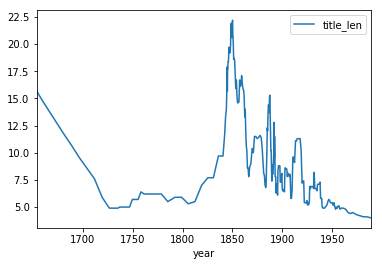

In [19]:
luther_year_len.rolling(window=10).mean().plot(x='year')

In [20]:
bib = nb.book_corpus(title="%bibel%", period=(1100, 1920), limit=5000)

In [21]:
bib['len'] = title_len(bib)

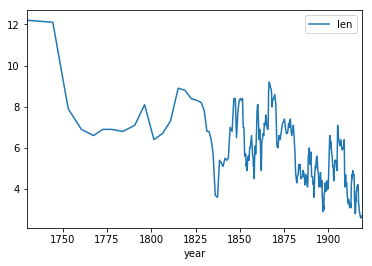

In [22]:
bib[['year', 'len']].sort_values(by='year').rolling(window=10).mean().plot(x='year')

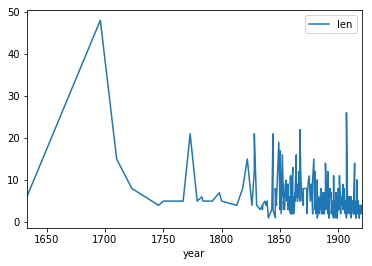

In [27]:
bib[['year', 'len']].sort_values(by='year').plot(x='year')

In [29]:
bib.sort_values(by='len', ascending=False)

,urn,author,title,year,len
66,2008092913004,"Lassenius, Johan","Bibelske Wirach, til Gudelige Andagters søde L...",1696,48
232,2013042608073,"Roberts, Robert","Kristenheden paa vildspor, eller Den populære ...",1907,26
45,2014031808053,"Luther, Martin","Bibelsk Sprog- og Skat-Kiste i tre Dele, hvori...",1867,22
301,2010021810001,"Horster, Joachim Frederik",Kort Udtog af de Bibelske Historier til Ungdom...,1773,21
228,2010070503001,"Horster, Joachim Frederik","Kort Udtog af de Bibelske Historier, til Ungdo...",1828,21
265,2010063003003,"Horster, Joachim Frederik","Kort Udtog af de Bibelske Historier, til Ungdo...",1844,21
42,2010042703061,"Andresen, P.","Bibelske Krønike-Riim, eller historiske Psalme...",1849,19
181,2010020103009,"Andresen, P.",Udvalg af Bibelske Krønike-Riim over Fortæling...,1850,17
13,2006111400042,,"100 Missions-Psalmer ; med et Tillæg, indehold...",1852,16
263,2009090703011,,Bibelsprog til de for den anordnede Religionsu...,1864,16


In [30]:
nb.metadata(2008092913004)

[[2008092913004,
  'Lassenius, Johan',
  1696,
  'Bibelske Wirach, til Gudelige Andagters søde Lugt, af denHellige Skrift saaledis tilsamen sanket, at den Gudelskende Siel, med den Hellig Aands egne Ord daglig kand tale med Gud i allehaande Aandelige og Legemlige Anliggende og og giøre sig ferdig til et Christeligt Lefnet saa og een salig Død',
  'Til med een hellig Forberedelse til Skrifte-Stolen og denhellige Nadvere',
  'Bekostet af Johan Jost Erythropilus',
  'unknown',
  '9e9ea116c14439240098ce3408caade9',
  'dan',
  '']]

In [204]:
print(list_of_list_to_string(nb.metadata(2014031808053), sep='\n'))

2014031808053
Luther, Martin
1867
Bibelsk Sprog- og Skat-Kiste i tre Dele, hvori over 400 Sprog af den hellige Skrift med aanderige og eftertrykkelige Ord, blive forklarede

Gram
unknown
d9e8b031d5fe8c8c346ec0f25a5ac0ac
nob



In [37]:
nb.urn_concordance(word="genres", urns=nb.pure_urn("""Varig lenke
https://urn.nb.no/URN:NBN:no-nb_digibok_2007090504002
IIIF Drag-n-drop"""), size=50)

In [31]:
nb.metadata(2013042608073)

[[2013042608073,
  'Roberts, Robert',
  1907,
  'Kristenheden paa vildspor, eller Den populære theologi vist at være ubibelsk baade i lære og i praxis og den sande apostoliske lære fremstillet i atten foredrag',
  '(først udgiven som tolv foredrag over Bibelens sande lære)',
  'Ludv. Johnsen',
  'unknown',
  '69af5b11c2d64622902b0db5a915a33b',
  'nob',
  'eng']]

In [23]:
text = """Book titles have developed out of the historical first page (Hoek 1981 as cited in Genette 1997). Modern paratextual elements like title and subtitle, abstract and foreword, table of contents, and publishing information, all belonged in some variant to the first page of books for a certain period within the printing history, a period which ended in the 19th century, almost within the same time span across different national publishers and printing houses. Much of the information from the first page is catalogued as title in modern metadata practice. The title in bibliographies, as a cataloging feature, became shorter over time, a process that appears to be closely connected with publishing history, and the way books are organized materially and visually.The paratextual elements, partly developed from the first page, found their way into different areas of the book layout. Title and author on the front, publishing information on third page, with table of contents before the foreword, along with index at the end, and footnotes interspersed with the text. There is a grammar to the layout of books, constant across printing houses and practices. The shortening of titles may be seen in connection with how the book binding practice changed during the first half of the 19th century, when it became custom to publish books ready bound, together with a dust jacket, or just with a dust jacket, or box. The dust jacket itself contains paratextual elements that are not found elsewhere in the book, like illustrations and blurbs, although there is an overlap in content. In this paper, we will discuss and document the development of the first page, from the middle of 19th century and onwards. Specifically, how it has developed into several parts and functions, as alluded to above, and try to list as much as possible of the paratextual elements that go into a book, in addition to what emanated from the historical first page. One hypothesis to investigate is the parallel development of book binding practices with certain paratextual elements. We will also discuss paratext as metadata, how some of these elements may disappear with digital publishing, while reoccurring in different places within the digital codex. For example, the index is a hidden feature of digital books, and no longer an explicit textual element, while footnotes may be interactive elements of the book, similar to hyperlinks for bibliographic references. Our material consists of metadata from available repositories from different libraries, and the collection of digitized books from the National Library of Norway
"""

In [24]:
len(text.split())

417

In [25]:
luther_df

,urn,author,title,year,title_len
55,2016112829001,"Bang, Christen Staphensøn","Postilla Catechetica, Ded er: Doct. Martini Lu...",1650,15
50,2016022629002,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1651,15
49,2015102229006,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1652,15
52,2015102229002,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1652,15
48,2015102229007,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1653,15
53,2015102229009,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1653,15
47,2015102229008,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1653,15
54,2015102229004,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1654,15
10,2015092829005,"Bang, Christen Staphensøn","Postilla Catechetica, ded er: Doct. Martini Lu...",1657,22
51,2015090327002,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1662,15


In [164]:
urner_moderne = nb.book_corpus(period=(1600, 2020), limit=100000).sort_values(by='year')

In [165]:
urner_moderne['len'] = title_len(urner_moderne)
#urner_moderne.set_index('year')

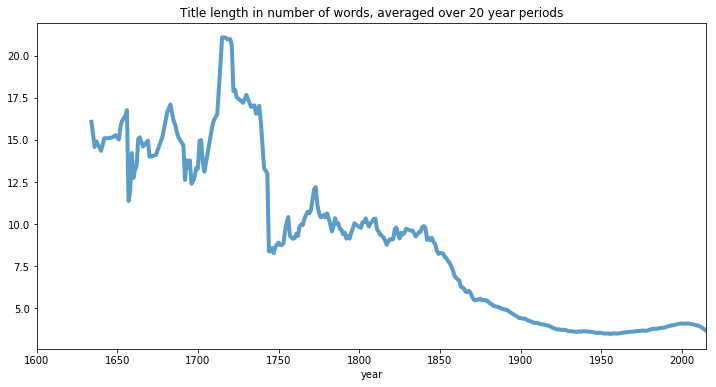

In [169]:
urner_moderne[['year', 'len']].groupby('year').mean().rolling(window=20).mean().plot(figsize=(12,6), lw=4,alpha=70, legend=False, title='Title length in number of words, averaged over 20 year periods');

In [138]:
urner_alle = nb.book_corpus(period=(1600, 1920), limit=50000).sort_values(by='year')

In [139]:
urner_alle['len'] = title_len(urner_alle)

In [140]:
urner_alle['charlen'] = title_charlen(urner_alle)

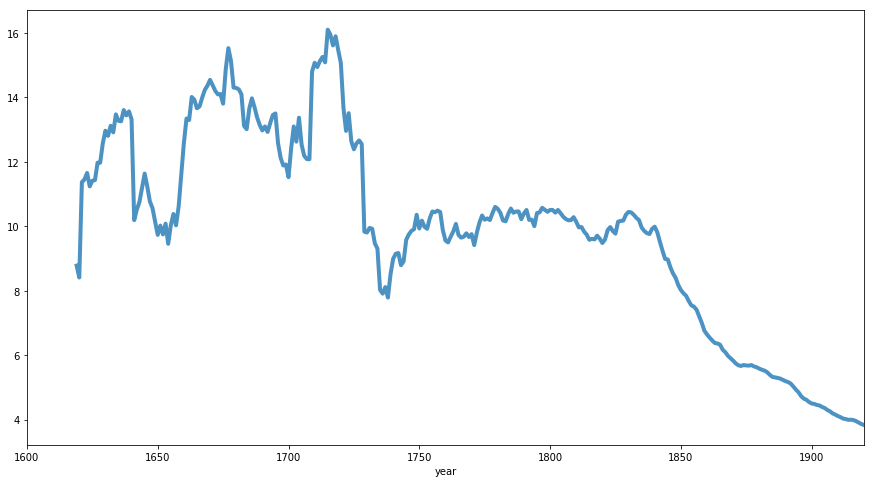

In [147]:
urner_alle[['year','len']].groupby('year').mean().rolling(window=20).mean().plot( figsize=(15,8), lw=4, alpha=.8, legend=False)

In [46]:
urner_alle.sort_values(by='len', ascending=False)

,urn,author,title,year,len
15420,2015083126004,"Trundhiemb, Claus Anderssøn","Heptaëmerinon, eller Guds Hvile paa den sivend...",1676,149
13420,2015052826002,Cort Aslakssøn,Oratio Theologico-Historica De Religionis per ...,1621,122
16907,2015120929004,"Smed, Niels","Danmarckes og Norges Lande-Soels-Formørckelse,...",1702,114
6649,2015121629001,"Friis, Peder Claussøn",Topographia Norwegiae. Das ist Eigenliche Besc...,1685,108
14742,2016101726006,"Wiborg, Anders Davidsen","En nye Videnskab angaaende Navigationen, som i...",1774,107
10441,2015092829003,Tormod Torfæus,"Orcades, seu Rerum Orcadensium historiae libri...",1715,97
9822,2016052548045,"Paus, Hans",Samling af gamle norske Love. I. Part Indehold...,1751,91
16123,2008071112013,"Ræder, J.C.",Motiveret Klage over den kongl. norske Regjeri...,1848,89
18221,2009030313005,"Wilse, J.N.",Tale holden i Christiania den 4de Junii 1793 f...,1793,80
3481,2015102229001,"Egede, Hans",A description of Greenland. Shewing the natura...,1745,80


In [47]:
nb.metadata(2015083126004)

[[2015083126004,
  'Trundhiemb, Claus Anderssøn',
  1676,
  'Heptaëmerinon, eller Guds Hvile paa den sivende Dag efter hand hafde det store og forunderlige Himmelens og Jordens Systema, med alt sit indehafvende rørlige oc urørlige i de sex Skabe-Dage, ved guddommelige Mact og Viszdom, oprettit, dannit og prækteligen fremstillet. Indeholdende: Hvorledis Gud hvjlede aff sit Arbeyde, i det hand lod aff, meere at skabe, og hvorledis hand siden mit i denne sin hvjle for os, med at trøste, forsjune, lære, bære og os aff Moders Liff at uddrage, omhyggeligen og dagligen arbeyder, fornelig hvorledis hand hvjler ved sin Aand i de ret-elskende Christnis Hierter, og ved Ordet og Sacramenterne i sit Helligdoms Huus paa Jorden, hvilcket kaldis Guds Rolighed udi 2. Chr. 6. v. 41. Psalm. 132 v. 7,8,14, Apostl. 9, 7, 94 &amp;c Til et Supplementum, Continuation og Anhang paa det berømmelige Hexaëmeron Aröboense samlet, og, ved Guds Krafft,  paa Alexandrinske Rim sammenskreffvet aff Claus Anders-Søn Trun

In [50]:
inneholde = nb.book_corpus(title="% Indeholdende%", limit=10000)

In [53]:
mu.printmd(list_of_list_to_string(list(map(lambda x: nb.metadata(x), inneholde['urn']))))

[2008071112021, 'Schultz, Lyder', 1775, 'Afhandling, indeholdende Besvarelse paa det Spørsmaal', 'hvor vidt det kunde ansees Gavnligt eller Skadeligt, at Rund-Fisk bliver virket i Romsdals Fogderie og Trondhiems Stift?', '', 'unknown', '51b012c8b3a20b225cdc9848003da685', 'dan', '']

[2014071526002, 'Smith, Fr.', 1845, 'Norsk-Spansk Parleur indeholdende en Samling af daglige Udtryk og Talemaader', '', 'I.C. Lund', 'unknown', '641cf66a871eb43ac229ad6feceb5903', 'mul', '']

[2009071004021, 'Lindeman, Ludv. M. (Ludvig Mathias)', 1882, 'Ziffer-Koralbog indeholdende Melodierne til Landstads og Hauges Salmebøger', 'udsatte til Salmodikon og Sang for Seminarier, Skole og Hjem', 'Cappelen', 'unknown', '6f0eb2d1d503594621a440ae3fa69a98', 'nob', '']

[2016022548049, '', 1861, 'Bibelen eller den hellige Skrift, indeholdende det Gamle og Nye Testamentes canoniske Bøger', '', 'Grøndahl', 'unknown', 'f20746d3a8f58949c0df9aff6e6aed84', 'und', '']

[2015060948051, 'Hedegaard, C.D.', 1757, 'Siette Forsøg til en Dansk Juridisk Dissertation, indeholdende nogle faae Meditationer', 'over 1. Eeds Formularen ..., 2. Den Particul af Dommer Eeden', 'F.Chr. Pelt', 'unknown', 'cc4a5bf2ebda613309785028ac32039b', 'dan', '']

[2015010648113, 'Luther, Martin', 1847, 'Kraft- og saftfulde Kjerne af de Evangeliske Sandheder, udtagen af Dr. Martin Luthers Kirke- og Huus-postiller, indeholdende en fuldkommen Forklaring over alle Søn- og Fest-Dages Evangelier', '', 'S.A. Steen', 'unknown', 'e283879feb4aa0a405cbf5436479d43c', 'nob', '']

[2009010503041, 'Grimstvedt, Kristian', 1891, 'Bibel-ordbog indeholdende henimod 40,000 alfabetisk ordnede uddrag af bibelsteder med vedføiede henvisninger', 'efter de i Norge og Danmark gangbare bibler (de kanoniskebøger)', 'Bibel-ordbogens expedition', 'unknown', '3b3901b3b513be39caac46cfcd53e09b', 'nob', '']

[2008100312001, 'Rolfsen, O.H.', 1842, 'Formularbog, indeholdende Regler og Formularer for de forskjellige Kontrakter, Dokumenter, Ansøgninger m.v', '', '', 'unknown', '515138d6fbb411c2be5e845269297fba', 'nob', '']

[2016030326002, 'Bang, Maren Elisabeth', 1843, 'Huusholdningsbog for Almuen, indeholdende Anviisning til paa bedste og billigste Maade at tillave de paa Landet brugelige Retter, saavel til Hverdags som til Gjestebude', '', 'Guldberg &amp; Dzwonkowski', 'notfiction', '97d8ae1f2fd379e1fe75c2ee968d4bb9', 'nob', '']

[2010063003027, '', 1839, 'Hans kongelige Majestæts naadigste Proposition til Norges Riges Storthing, betræffende Udfærdigelse af en Lov indeholdende Forandringer i og Tillæg til Loven om Høiesteret af 12 Septbr. 1818', '', '[Den norske Regjering]', 'unknown', '46d1ec04dcf97ee6258d7d69d302e4b4', 'nob', '']

[2010070503004, '', 1839, 'Hans Kongelige Majestæts naadigste proposition til Norges riges Storthing om Udfærdigelse af en Lov, indeholdende almindelige Bestemmelser om Brandvæsenet i Kjøbstæderne', '', '', 'unknown', 'deca831551ac87640eebdd3c8b172920', 'und', '']

[2015102729002, 'Birch, H.J.', 1795, 'Billedgallerie for Fruentimmer, indeholdende Levnetsbeskrivelser over berømte og lærde danske, norske og udenlandske Fruentimmere, Sognepræst i Middelfart, Medlem af det Kongelige norske Videnskabers Selskab i Trondhjem og det genealogiske og heraldiske Selskab i Kiøbenhavn', '', 'Paa S. Poulsens forlag;Kiøbenhavn, 1793-1795', 'notfiction', 'b0261d3077975aa5a1549b6947cc464d', 'dan', '']

[2015083126004, 'Trundhiemb, Claus Anderssøn', 1676, 'Heptaëmerinon, eller Guds Hvile paa den sivende Dag efter hand hafde det store og forunderlige Himmelens og Jordens Systema, med alt sit indehafvende rørlige oc urørlige i de sex Skabe-Dage, ved guddommelige Mact og Viszdom, oprettit, dannit og prækteligen fremstillet. Indeholdende: Hvorledis Gud hvjlede aff sit Arbeyde, i det hand lod aff, meere at skabe, og hvorledis hand siden mit i denne sin hvjle for os, med at trøste, forsjune, lære, bære og os aff Moders Liff at uddrage, omhyggeligen og dagligen arbeyder, fornelig hvorledis hand hvjler ved sin Aand i de ret-elskende Christnis Hierter, og ved Ordet og Sacramenterne i sit Helligdoms Huus paa Jorden, hvilcket kaldis Guds Rolighed udi 2. Chr. 6. v. 41. Psalm. 132 v. 7,8,14, Apostl. 9, 7, 94 &amp;c Til et Supplementum, Continuation og Anhang paa det berømmelige Hexaëmeron Aröboense samlet, og, ved Guds Krafft,  paa Alexandrinske Rim sammenskreffvet aff Claus Anders-Søn Trundhiemb', '', 'Præntet hos Nicolai Müller og hans Efterlefverske paa Authoris egen Bekostning', 'poetry', '8e9abea3a0032b8bd7657eac748e2d5e', 'dan', '']

[2015082448181, '', 1884, 'Rigsrets-Tidende indeholdende Forhandlinger i Rigsretten : 2det Bind', '(Realitetsproceduren: Deduktion og Tilsvar i Rigsretssagen mod Statsminister Selmer)', 'Th. Steens Forlags-Expedition', 'unknown', '306d3acd12fafa67675ba93bece1ad48', 'und', '']

[2009081303004, 'Rolfsen, O.H.', 1859, 'Formularbog, indeholdende Regler og Formularer for de forskjellige Kontrakter, Dokumenter, Ansøgninger m.v', '', '', 'unknown', '5dc23bf5f7e4ade4f7e68bcecce7e23d', 'und', '']

[2016101828014, '', 1844, 'Damernes Orakel, eller Det smukke Kjøns Sandsiger, indeholdende Raad for de vigtigste Tilfælde i Livet', 'med en Samling af Morskabs- og Pantelege samt Pantedomme : en Lommebog for Venner af munter og utfyldig Underholdning', 'Forlagt af Peter Tidemand Malling. Trykt i Forlæggerens Officin', 'notfiction', '110cd541c2e1ec81c7c590b7d01745a4', 'nob', 'fre']

[2016101748010, '', 1892, 'Ang. Utfærdigelse af Love: 1) om Underholdningsbidrag til uægte Børn m.V., 2) om Underholdsningsbidrag til ægte Børn og Hustru, 3) indeholdende Forandring i Arveloven af 31te Juli 1854', 'Justits- og Politi-Departementets underdanigste Indstilling af 19de Februar 1892', '[s.n.]', 'unknown', '09cf00dac7dc34176e3fe3a8a24ebbd8', 'nob', '']

[2013011713002, 'Camstrup, Ole', 1739, 'Trifolium metricum, eller Een Samling af adskillige poetiske Sager udi 3de Sectioner, Indeholdende een Deel Miscellanea, Inscriptioner, Latinske og Danske Brude- og Liig-Vers, Ved adskillige Leyligheder udgivne, og nu effter Fornemme Liebhaberes Begiering til Trykken befordrede', '', 'Trykt hos Kongl. Univ. Bogtrykker Owe Lynow, boende paa Vandkonsten', 'poetry', '80d85e29ee2371b0cee38ba52c2a2b87', 'dan', '']

[2010031510026, 'Hallager, M.', 1807, 'Forsøg til en Læse-Øvelse-Bog, hvoraf Børn kunde lære at kjende alle Slags danske og latinske Bogstaver, samt tillige at læse rigtig og forstaaelig, indeholdende: forskjellige Materier til deres Forstands Oplysning og Hjerters Forbedring', '', '', 'unknown', 'a95cb8b78f3e896982663ff21124672d', 'dan', '']

[2013092507118, '', 1903, 'Meddelelser fra det norske Rigsarchiv, indeholdende bidrag til Norges historie af utrykte kilder', '', 'Feilberg &amp; Landmarks forl.;Christiania : Feilberg &amp; Landmarks forl., 1865-1933', 'unknown', '46c06f821693caabb47ada14525eef80', 'nob', '']

[2016101927001, 'Lindeman, O.A. (Ole Andreas)', 1838, 'Choral-Bog, indeholdende de i Kingos, Guldbergs og den evangelisk-christelige Psalmebog forekommende Melodier', '', 'Grøndahl', '', 'dfb32ed32ebb2c9057b0db2751ec69a0', 'nob', '']

[2016052548041, 'Mathiesen, Hans', 1823, 'Handels-Haandbog, indeholdende Kundskab om de mærkværdigste Landes og Stæders Mynt, Maal og Vægt, med sammes nøiagtige Forhold til Norges, samt visse Landes og Stæders Vexelmaader og Priser efter sølvpari, nogle cours-, disconto- og decimalbrøks-tabeller m.m', '', 'Jacob Lehmann', 'unknown', '77b44f492f9a14d33018322bfd34e0bc', 'nob', '']

[2008121812001, 'Rolfsen, O.H.', 1838, 'Formularbog, indeholdende Regler og Formularer for de forskjellige Kontrakter, Dokumenter, Ansøgninger m.v', '', 'Guldberg &amp; Dzwonkowski', 'unknown', '51b2a4818831590a0c571b991c175d90', 'nob', '']

[2013061408123, '', 1901, 'Synodalhaandbog indeholdende den Norske Synodes Forfatning samt Inkorporationsartikler, Bilove og gjældende Bestemmelser for dens Institutioner, Embedsmenn og Virksomhed', '', 'Lutheran Publishing House', 'unknown', '70d7ceb285477e92167daf3c3ef94238', 'mul', '']

[2016012129002, 'Syv, Peder', 1807, 'Peder Syvs kjernefulde Ordsprog, udsøgte og ordnede ved R. Nyerup, Professor. Med en Fortale indeholdende Bidrag til danske Ordsprogs Litteratur', '', 'Trykt paa A. &amp; S. Soldins Forlag hos C. M. Cohen', 'poetry', 'b1cec9a374046df90d80d85cc8363a0c', 'dan', '']

[2013062008008, '', 1912, 'Meddelelser fra det norske Rigsarchiv, indeholdende bidrag til Norges historie af utrykte kilder', '', 'Feilberg &amp; Landmarks forl.;Christiania : Feilberg &amp; Landmarks forl., 1911-1933', 'unknown', '2ce4cc8569a34d5ca67b82dcc4506656', 'nob', '']

[2008040212002, 'Treschow, Niels', 1834, 'Om Norges Grundlov, udgivet efter Forfatterens Død. Med et Tillæg, indeholdende Forfatterens Udkast til en Constitution, Grundtræk til en Statsform og om National-Velstand med Hensyn til Norge', '', 'Trykt paa Boghandler P.J. Hoppes Forlag, hos J. C. Abelsted', 'notfiction', '8e18eb2602be71178292696f7beb2c82', 'nob', '']

[2011121412006, '', 1914, 'Bibelen, eller Den hellige Skrift indeholdende Det Gamle og Det Nye Testamentes kanoniske Bøger', '', 'Det norske Bibelselskabs Forl.', 'unknown', 'c65c80a3d903bd8a7c8990f2753e4b11', 'nob', '']

[2008081102005, '', 1839, 'Lov angaaende Haandværksdriften (1839) ; Lov indeholdende nærmere Bestemmelser om Haandværksdriften (1845) ; Lov indeholdende Forandringer i de nu gjældende Lovbestemmelser angaaende Haandværksdriften (1851) ; Lov indeholdende endring i Lovgivningen om Haandværksdriften (1857)', '', '', 'unknown', '1373844d8908b67b961238b7658fdeec', 'und', '']

[2016060348162, 'Pontoppidan, Erik', 1914, 'Sandhed til Gudfrygtighed, i en enfoldig og efter Mulighed kort, dog tilstrækkelig Forklaring over Sal. Dr. Morten Luthers liden Catechismus indeholdende alt det, som den, der vil blive salig, har behov at vide og gjøre', '', '', 'unknown', '778b69eaea60d9fb250bac605de5d741', 'nob', '']

[2013070226009, '', 1815, 'Rigs-Act, oprettet imellem Norges Riges Storthing og Sveriges Riges Stænder, indeholdende Bestemmelse af de imellem begge Riger opkomne Constitutionelle Forhold : sanctioneret af Hs. Majestæt Kongen den 26de August 1815', '', 'Grøndahl', 'unknown', '4a139a4fb263b7ec1099b4c4746c64d6', 'nob', '']

[2016051048069, '', 1861, 'Bibelen eller den hellige Skrift, indeholdende det Gamle og Nye Testamentes canoniske Bøger', '', 'Det Brittiske og Udenlandske Bibelselskab', 'unknown', '9956865988367a149b03f30759a832bb', 'nob', '']

[2009020900076, 'Krogh, G.', 1869, 'Praktisk Geometri indeholdende Plangeometri og Stereometri', 'Til Brug for Borgerskoler og høiere Almueskoler samt til Selvundervisning', 'Beyer', 'unknown', 'adecc288543cc25da937b641d14ff905', 'nob', '']

[2015102729003, 'Birch, H.J.', 1793, 'Billedgallerie for Fruentimmer, indeholdende Levnetsbeskrivelser over berømte og lærde danske, norske og udenlandske Fruentimmere, af H. J. Birch, Sognepræst i Middelfart, Medlem af det Kongelige norske Videnskabers Selskab i Trondhjem og det genealogiske og heraldiske Selskab i Kiøbenhavn', '', 'Paa S. Poulsens forlag;Trykt hos Morthorstes Enke;Kiøbenhavn, 1793-1795', 'notfiction', '02a43ac080f006d0cc427e9c64415231', 'dan', '']

[2016061329002, 'Lundh, Gregers Fougner', 1849, 'Norsk Havebog, indeholdende Kjøkken-, Frugt- og Blomsterhaven', '', 'P.T. Mallings Forlags-Boghandling', 'notfiction', '429339873c09ba2e12422267b2b67634', 'nob', '']

[2008112003002, 'Hallager, M.', 1856, 'Ny tydsk Lærebog for Begyndere, indeholdende udvalgte passende Stykker med tilføiede norske Gloser, og en kort tydsk Sproglære samt norske og tydske Stiiløvelser', '', 'Hviids Enke', 'unknown', '11f32a4f019811409c476fa3038e9492', 'nob', '']

[2009082112001, 'Bang, Maren Elisabeth', 1862, 'Vinbog indeholdende Anviisning med Hensyn til Tillavning af forskjellige Slags Punsch, Frugtvine, Liqueurer, Limonade, Rum m.m', '', 'Berge', 'unknown', 'e3ca36900bc53c0dbf27f4251de05aa8', 'und', '']

[2016031548121, 'Gossner, Johannes', 1877, 'Skatkiste, indeholdende bibelske Betragtninger paa hver Dag i Aaret', 'Ledsagede af opbyggelige Psalmer, til Fremme af Husandagt og Gudsfrygt', '', 'unknown', 'e6b3646ffa39ce97f534e76027127b20', 'nob', '']

[2012021608013, '', 1898, 'Brev- og formularbog, indeholdende retskrivningsregler og breve [...] samt formularer til dokumenter [...]', '', 'Damm', 'unknown', '21bc3841fb1f5907e671798f5b6b37b5', 'nob', '']

[2013070226010, '', 1842, 'Rigs-Act, oprettet imellem Norges Riges Storthing og Sveriges Riges Stænder, indeholdende Bestemmelse af de imellem begge Riger opkomne constitutionelle Forhold', '', 'Chr. Grøndahl', 'unknown', '6cef769c57e097d35a3267ad1dfb187e', 'nob', '']

[2013040408036, '', 1933, 'Meddelelser fra det norske Rigsarchiv, indeholdende bidrag til Norges historie af utrykte kilder', '', 'Feilberg &amp; Landmarks forl.;Christiania : Feilberg &amp; Landmarks forl., 1911-1933', 'unknown', 'adc011742152d85d7da89cdc4ee93cdb', 'nob', '']

[2009032512001, 'Lowum, Jens Christian', 1795, 'Nyt Norske Bondes Speil indeholdende adskillige for Landmanden vigtige Kongelige Anordninger og Reskrifter', '', '', 'unknown', 'c4ef5af2223ee2a0b6574acbb961bd1e', 'dan', '']

[2008100610001, 'Rolfsen, O.H.', 1839, 'Formularbog, indeholdende Regler og Formularer for de forskjellige Kontrakter, Dokumenter, Ansøgninger m.v', '', 'Guldberg', 'unknown', '32cc56635d29312439a35df51b0f8815', 'nob', '']

[2008081510001, 'Dorothe Engelbretsdatter', 1868, 'Sjælens Sangoffer, indeholdende endel gudelige Salmer tilligemed Morgen- og Aften-sukke til hver Dag i Ugen, samt hendes andægtige Taareoffer', '', 'Beyer', 'unknown', '033ea35e937ee43b8052c6dc4d2d40e4', 'nob', '']

[2014082608058, 'Allum, Hans', 1980, 'Norske Huusmoder i sit Kjøkken og Spisekammer, eller Norsk Huusholdningsbog, indeholdende Koge-, Stege-, Bage- og Syltekunsten, i alphabetisk Orden i Vers', '', 'Ikaros', 'notfiction', 'b542cde9e9509310e3703f03c81c41cb', 'nob', '']

[2014102208098, 'Bretteville, Carl', 1904, 'Ordliste indeholdende ca. 1000 juridiske udtryk med definitioner, samt endel latinske gloser, der forekommer i det juridiske pensum', '', 'I hovedkommission hos Grimsgaard &amp; Bretteville', 'unknown', '7495de17e8a5963a837e0a82aeb489c2', 'nob', '']

[2009020400038, 'Krogh, G.', 1878, 'Praktisk geometri indeholdende plangeometri og stereometri, samt landmaaling', 'til brug for amtsskoler, folkehøiskoler og underofficersskoler', 'Beyer', 'unknown', '41029f0340ae1579052355754e8167a7', 'nob', '']

[2013052807020, '', 1868, 'Motiveret Forslag til Lov om Kirkeforfatningen, Lov indeholdende nærmere Bestemmelser med Hensyn til Valgene til Kirkemøde, og Grundlovsbestemmelse angaaende Forandring i Grundlovens § 16 m. fl', '', '[s.n.]', 'unknown', '890d0089ecb6b88d5008ef432a876017', 'nob', '']

[2008040104012, '', 1890, 'Lov af 29de juni 1889 indeholdende forandringer i lov om forbrydelser af 20de august 1842', 'med uddrag af lovens forarbeider og oplysende bemærkninger', 'Mallings boghandel', 'notfiction', '4e9aa2fbd39eea87a1084cf1ef3f9e6b', 'nob', '']

[2013032208054, '', 1928, 'Meddelelser fra det norske Rigsarchiv, indeholdende bidrag til Norges historie af utrykte kilder', '', 'Feilberg &amp; Landmarks forl.;Christiania : Feilberg &amp; Landmarks forl., 1911-1933', 'unknown', 'bd72f5bd3a6b5cee0b957cd404411fd0', 'nob', '']

[2010112410001, 'Neergaard, Jon', 1830, 'Odelsmands Tanker om Norges nærværende Forfatning tilligemed en Samtale indeholdende Veiledning for Bønder til en rigtigere Fremgangsmaade ved Udkaarelse af Valgmænd og Repreæsentanter', '', '', 'unknown', '2ef347f317be6c5c558a26088337f67c', 'nob', '']

[2015102729004, 'Birch, H.J.', 1795, 'Billedgallerie for Fruentimmer, indeholdende Levnetsbeskrivelser over berømte og lærde danske, norske og udenlandske Fruentimmere, af H. J. Birch,  Sognepræst i Middelfart, Medlem af det Kongelige norske Videnskabers Selskab i Trondhjem og det genealogiske og heraldiske Selskab i Kiøbenhavn', '', 'Paa S. Poulsens forlag;Trykt hos Matthias Seest;Kiøbenhavn, 1793-1795', 'notfiction', 'e8369cdce733ce193dea9cafd44ae63f', 'dan', '']

[2013061408154, '', 1865, 'Meddelelser fra det norske Rigsarchiv, indeholdende bidrag til Norges historie af utrykte kilder', '', 'Feilberg &amp; Landmarks forl.;Christiania : Feilberg &amp; Landmarks forl., 1865-1933', 'unknown', '095c006be309aeeaf87769b5cbc8143a', 'nob', '']

[2013103124002, '', 1837, 'Stortings-Efterretninger, indeholdende 8de ordentlige og 4de overordentlige Stortings Forhandlinger samt Rigsretten i 1836', '', 'Guldberg &amp; Dzwonkowski', 'unknown', 'db952f49fe420cd0752a5d9cb73b460f', 'nob', '']

[2008071112018, 'Schive, Jørgen', 1847, 'Kjøbstadsborgers Tanker om Norges nærværende Forfatning tilligemed en Samtale indeholdende Veiledning for Kjøbstadsborgere til en riktigere Fremgangsmaade ved Udkaarelsen af Valgmænd og Repræsentanter', '', '[s.n];Christiania : W. Kirkgaard', 'unknown', '63a874756a630df98e845b890335e39c', 'und', '']

[2013071208122, 'Petersen, P. Munch', 1864, 'Haandbog i Exerceerreglement for Infanteriet (efter Reglementet af 1848), indeholdende Rekrut-, Kompagni-, Korps- og Linie-Exercitien', '', 'Schibsted', 'unknown', '4eeb7f53119d8d4fa879dec171770a33', 'nob', '']

[2016052548045, 'Paus, Hans', 1751, 'Samling af gamle norske Love. I. Part Indeholdende 1. Kong Hagen Adelsteens Gule-Tings Lov først udgiven Anno 940, 2. Kong Magni Lagabæters Gule-Tings Lov udgiven 1274, hvortil er føyet en ældgammel Norsk Christen-Ret eller Kirke-Lov, 3. Kong Magni Lagabæters Bye-Lov udgiven for Kiøbstæden Bergen Anno 1274 af det gamle Norske i de nu brugelige Danske Sprog oversatte, og oplyvste med fornødne historiske, philologiske, geographiske og juridiske Anmærkninger, og næsten ved hver Materie henviist til de yngere og nu gjældende Norske Love, saavelsom og til den gamle Islandske Lov-Bog, Jons Bogen kaldet', '', 'Findes tilkiøbs hos J.W. Boppenhausen Kongl. Bibliotheque Bogbinder boende i store Grønnegade;Trykt hos Niels Hansen Møller;Kiøbenhavn : Findes tilkiøbs hos J.W. Boppenhausen ..., 1751-1752', 'notfiction', 'a91913a9be3b9ae4b1577f22f371200d', 'dan', '']

[2011051004133, '', 1911, 'Meddelelser fra det norske Rigsarchiv, indeholdende bidrag til Norges historie af utrykte kilder', '', 'Feilberg &amp; Landmarks forl.;Christiania : Feilberg &amp; Landmarks forl., 1911-1933', 'unknown', 'e1648ed67af5ad2357ede43e0cefe134', 'nob', '']

[2010063003019, '', 1824, 'Lov indeholdende Fundats for det Kongelige Norske Frederiks Universitet i Christiania [af 1824]', '', 'Chr. Grøndahl', 'unknown', '60c572aae73a431514f4d5f02dae7bd9', 'nob', '']

[2016041129005, 'Aalholm, N.M.', 1840, 'Franske Stiiløvelser, indeholdende Opgaver over alle den franske Sproglæres Regler', 'med henviisninger til M.C. Hansens, J. Deichmanns og L.S. Borrings Grammatiker, samt Øvelser for Viderekomne, Handelsbreve m. M', 'Paa P.T. Mallings Forlag. Trykt i Forleggerens Officin', 'notfiction', '9433717b5e516babbd0d4dc83e11b475', 'mul', '']

[2006111400042, '', 1852, '100 Missions-Psalmer ; med et Tillæg, indeholdende endeel Psalmevers til Brug ved Bibellæsninger og andre Andagts-Forsamlinger', '', 'Kielland', 'unknown', 'f676e4cfa82092b066caac56cf4767e5', 'nob', '']

[2014040724012, '', 1933, 'Meddelelser fra det norske Rigsarchiv, indeholdende bidrag til Norges historie af utrykte kilder', '', 'Feilberg &amp; Landmarks forl.;Christiania : Feilberg &amp; Landmarks forl., 1865-1933', 'unknown', '766b3ce5d85212292f44236057189606', 'mul', '']

[2012110608164, '', 1896, 'Udkast til Lov indeholdende Forandringer i Lov om Rettergangsmaaden i Straffesager af 1ste Juli 1887 med Motiver', '', '', 'unknown', 'dfb3a8cc48614367308dc00de7af83b9', 'nob', '']